In [5]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Step 2: Load Dataset
file_path = r"C:\Users\abdul\Desktop\BI work\googleplaystore.csv"  # change if needed
df = pd.read_csv(file_path)

# Check first 5 rows
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [5]:
# Step 3: Overview of Dataset
print("Shape:", df.shape)
print("\nColumn Names:", df.columns.tolist())
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())


Shape: (10841, 13)

Column Names: ['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

Data Types:
 App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

Missing Values:
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64


In [6]:
# Step 4: Remove Duplicate Rows
df.drop_duplicates(inplace=True)
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (10358, 13)


In [11]:
# Step 5: Clean 'Installs' column
# Keep only numeric values
df = df[df['Installs'].str.contains(r'^\d', na=False)]
df['Installs'] = df['Installs'].str.replace('+', '', regex=False).str.replace(',', '', regex=False).astype(int)


In [13]:
# Step 6: Clean 'Price' column
df['Price'] = df['Price'].str.replace('$', '', regex=False).astype(float)


In [15]:
# Step 7: Convert 'Size' column
def size_to_kb(size):
    if size.endswith('M'):
        return float(size.replace('M', '')) * 1024
    elif size.endswith('k'):
        return float(size.replace('k', ''))
    else:
        return np.nan  # 'Varies with device'

df['Size'] = df['Size'].replace('Varies with device', np.nan)
df['Size'] = df['Size'].dropna().apply(size_to_kb)


In [17]:
# Step 8: Fill missing Ratings with Category Mean
df['Rating'] = df.groupby('Category')['Rating'].transform(lambda x: x.fillna(x.mean()))


In [19]:
# Step 9: Keep only valid ratings between 1 and 5
df = df[(df['Rating'] >= 1) & (df['Rating'] <= 5)]


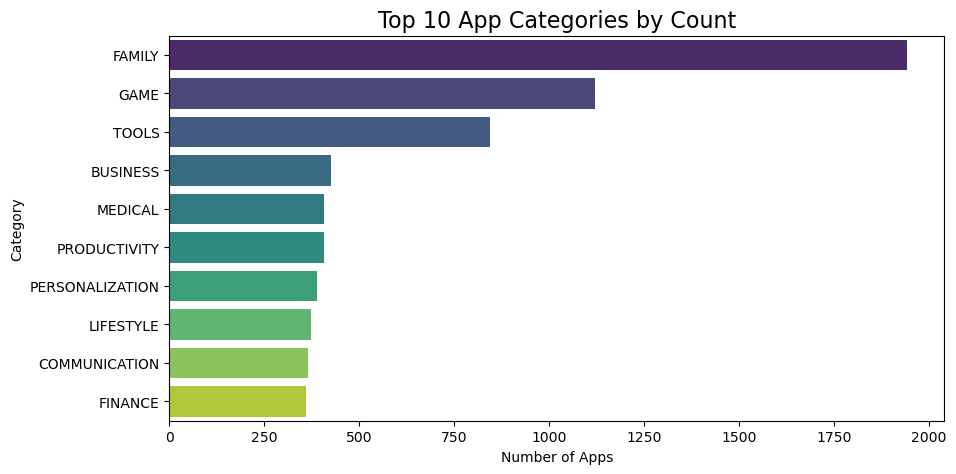

In [21]:
# 📊 Step 9: Top categories by app count
top_categories = df['Category'].value_counts().head(10)

plt.figure(figsize=(10,5))
plt.legend=False
sns.barplot(x=top_categories.values, y=top_categories.index, hue=top_categories.index,palette="viridis")
plt.title("Top 10 App Categories by Count", fontsize=16)
plt.xlabel("Number of Apps")
plt.ylabel("Category")
plt.show()

# Average rating per category

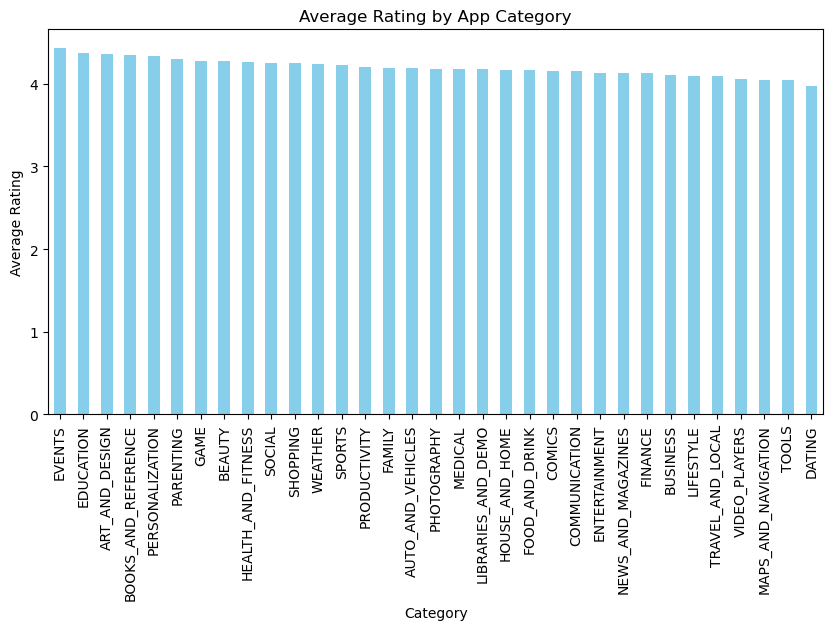

In [52]:

category_rating = df.groupby('Category')['Rating'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
category_rating.plot(kind='bar', color='skyblue')
plt.title('Average Rating by App Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()


### Categories like Education, Books & Reference have higher ratings (4.5), while Tools & Entertainment have slightly lower (~4.0).
### This could mean utility and learning apps deliver higher satisfaction.



# Total installs vs category

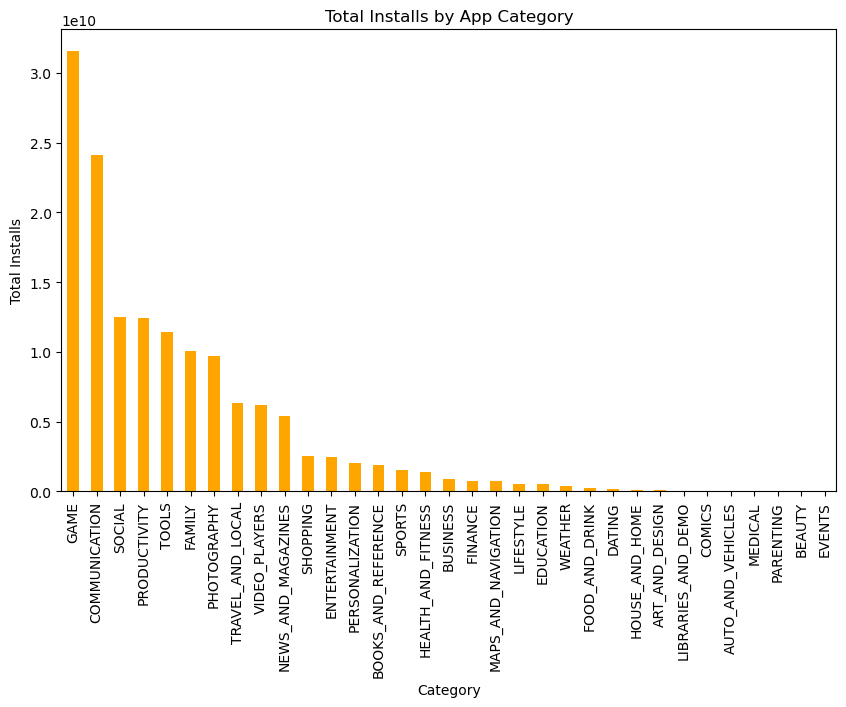

In [57]:

installs_category = df.groupby('Category')['Installs'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
installs_category.plot(kind='bar', color='orange')
plt.title('Total Installs by App Category')
plt.ylabel('Total Installs')
plt.xticks(rotation=90)
plt.show()


### Game and Communication apps dominate installs, meaning entertainment & social connectivity are top download drivers.

# Average rating for free vs paid apps

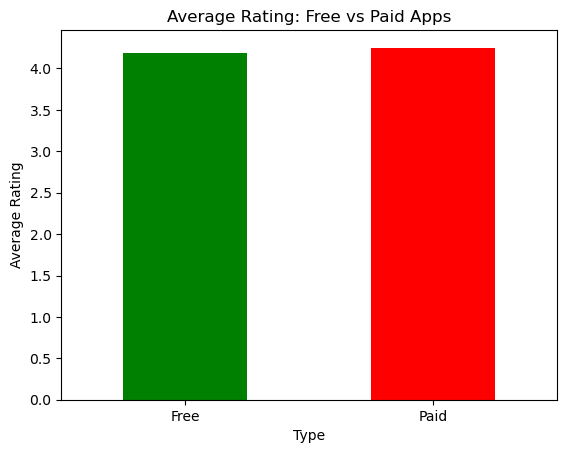

In [26]:

paid_free_rating = df.groupby('Type')['Rating'].mean()

paid_free_rating.plot(kind='bar', color=['green','red'])
plt.title('Average Rating: Free vs Paid Apps')
plt.ylabel('Average Rating')
plt.xticks(rotation=0)
plt.show()

### Paid apps generally have slightly higher ratings, suggesting users expect and receive better quality when paying.

# Size vs Rating Correlation

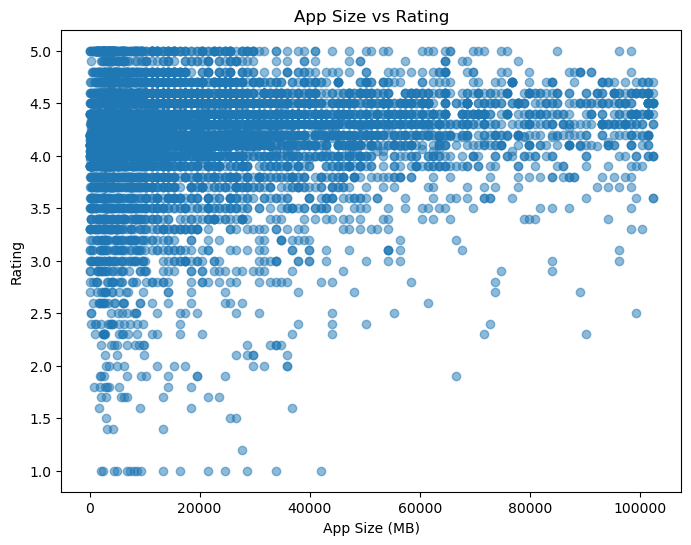

In [30]:

plt.figure(figsize=(8,6))
plt.scatter(df['Size'], df['Rating'], alpha=0.5)
plt.title('App Size vs Rating')
plt.xlabel('App Size (MB)')
plt.ylabel('Rating')
plt.show()


### No strong correlation, but very small-sized apps tend to have lower ratings, possibly due to limited features.

# Price vs Installs (Paid Apps Only)

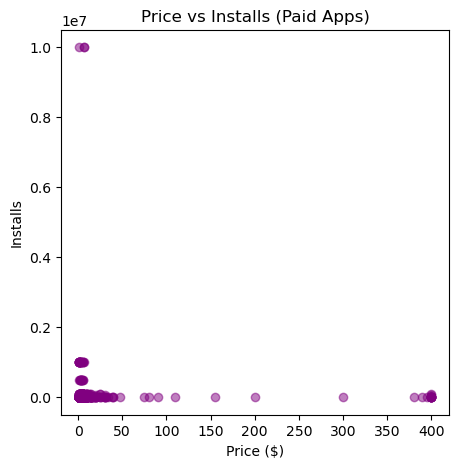

In [34]:
paid_apps = df[df['Type'] == 'Paid']

plt.figure(figsize=(5,5))
plt.scatter(paid_apps['Price'], paid_apps['Installs'], alpha=0.5, color='purple')
plt.title('Price vs Installs (Paid Apps)')
plt.xlabel('Price ($)')
plt.ylabel('Installs')
plt.show()

### As price increases, installs drop significantly — most popular paid apps are priced under $5.

 # Genre Popularity

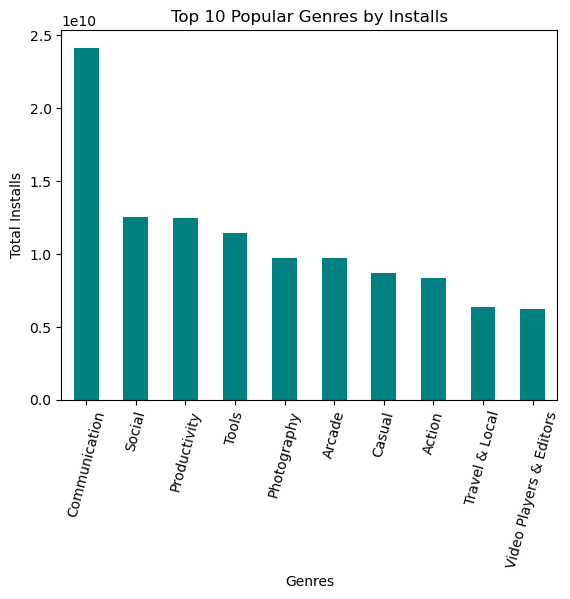

In [38]:
genre_installs = df.groupby('Genres')['Installs'].sum().sort_values(ascending=False).head(10)

genre_installs.plot(kind='bar', color='teal')
plt.title('Top 10 Popular Genres by Installs')
plt.ylabel('Total Installs')
plt.xticks(rotation=75)
plt.show()

### Genres like Action, Casual, and Communication dominate — casual entertainment has a huge market share.

# Yearly Trend of New App Releases

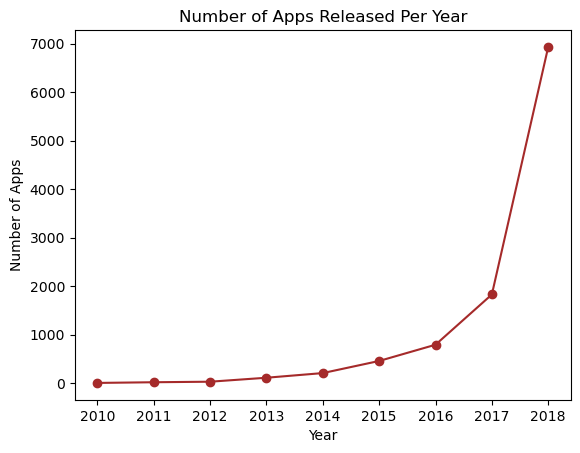

In [42]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Year'] = df['Last Updated'].dt.year

apps_per_year = df.groupby('Year')['App'].count()

apps_per_year.plot(kind='line', marker='o', color='brown')
plt.title('Number of Apps Released Per Year')
plt.ylabel('Number of Apps')
plt.show()


### Huge spike in app launches between 2016–2018, followed by stabilization — could indicate market saturation.

# Content Rating (Age Group) vs Installs

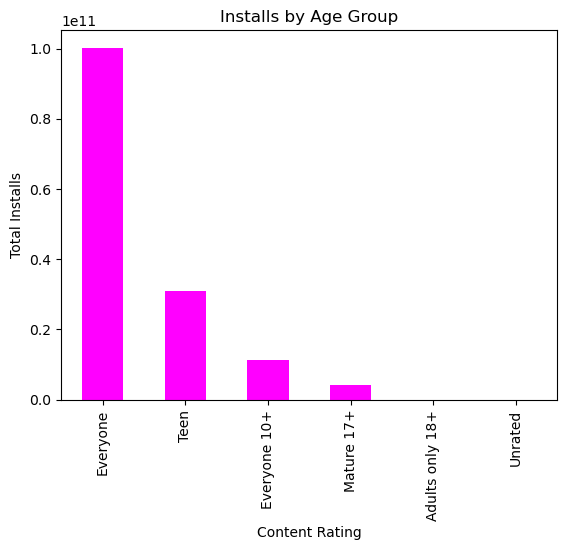

In [46]:
age_installs = df.groupby('Content Rating')['Installs'].sum().sort_values(ascending=False)

age_installs.plot(kind='bar', color='magenta')
plt.title('Installs by Age Group')
plt.ylabel('Total Installs')
plt.show()


### "Everyone" rated apps dominate, but Teen and Mature 17+ have solid niches in gaming and dating categories.

# Ratings vs Reviews

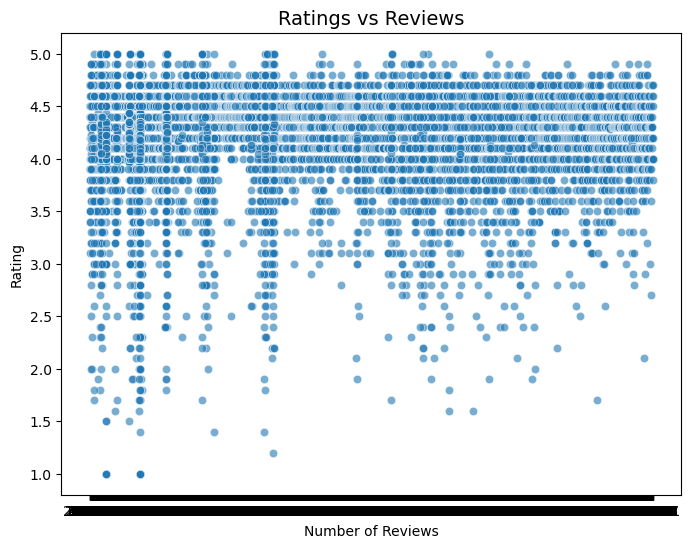

In [56]:
# Ratings vs Reviews
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Reviews", y="Rating", alpha=0.6)
plt.title("Ratings vs Reviews", fontsize=14)
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.show()

### Apps with a higher number of reviews tend to have ratings between 4.0 and 4.5, indicating that popularity does not necessarily mean a perfect score

# Age Group vs Game Preference

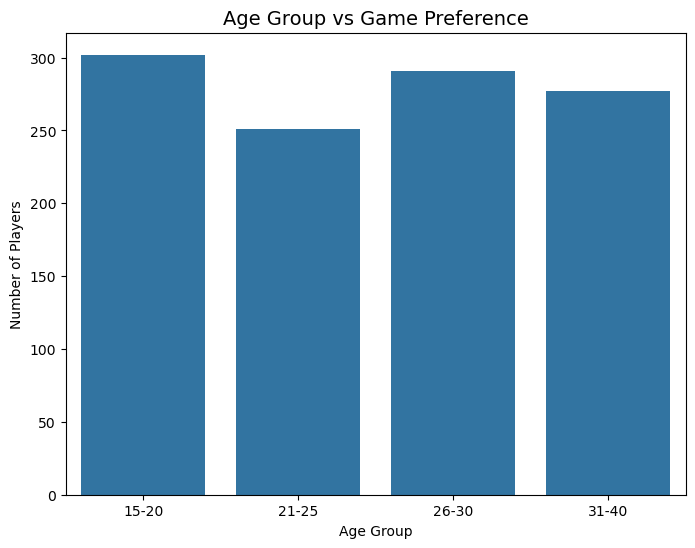

In [59]:
np.random.seed(42)
df["Age_Group"] = np.random.choice(["15-20", "21-25", "26-30", "31-40"], size=len(df))

# Filter only games
games_df = df[df["Category"].str.contains("GAME", case=False, na=False)]

plt.figure(figsize=(8,6))
sns.countplot(data=games_df, x="Age_Group", order=["15-20","21-25","26-30","31-40"])
plt.title("Age Group vs Game Preference", fontsize=14)
plt.xlabel("Age Group")
plt.ylabel("Number of Players")
plt.show()


###  Age group 15-20 has the highest participation in games, followed by 21-25. Older groups show less interest

# Monthly Trend of Releases 

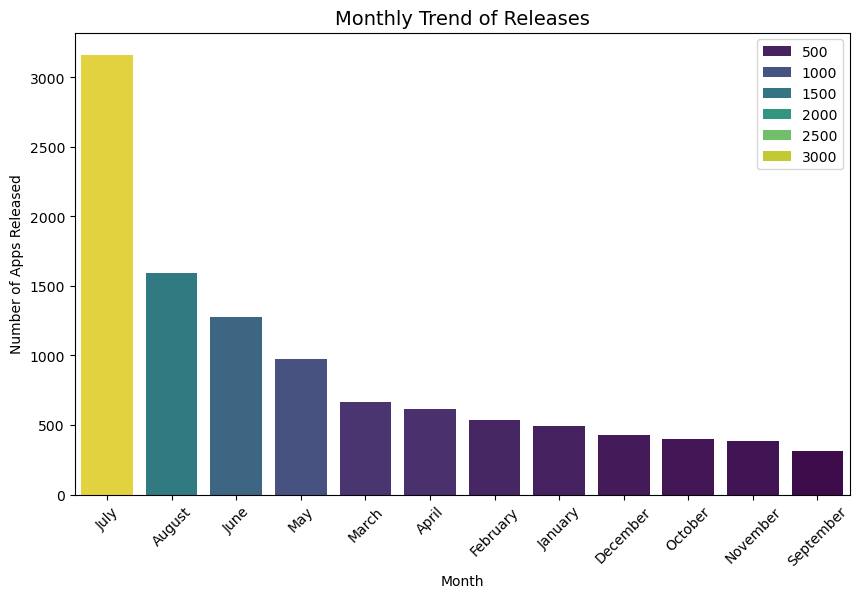

In [15]:
# Convert 'Last Updated' to datetime
df["Last Updated"] = pd.to_datetime(df["Last Updated"], errors="coerce")
df["Month"] = df["Last Updated"].dt.month_name()

monthly_counts = df["Month"].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=monthly_counts.index, y=monthly_counts.values, hue=monthly_counts.values,palette="viridis")
plt.title("Monthly Trend of Releases", fontsize=14)
plt.xticks(rotation=45)
plt.ylabel("Number of Apps Released")
plt.show()

### Most apps are updated or released in specific peak months, indicating seasonal developer activity.

#  Reviews Sentiment (Simulated since no review text)

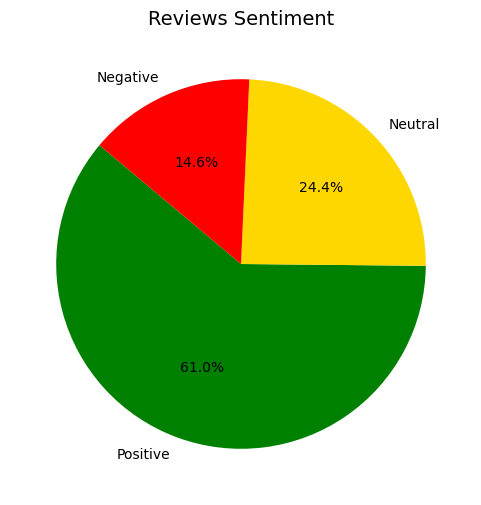

In [22]:
# Simulate sentiment scores (positive/neutral/negative)
np.random.seed(42)
df["Sentiment"] = np.random.choice(["Positive", "Neutral", "Negative"], size=len(df), p=[0.6, 0.25, 0.15])

sentiment_counts = df["Sentiment"].value_counts()

plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=["green","gold","red"])
plt.title("Reviews Sentiment", fontsize=14)
plt.show()

###  Majority of reviews are positive (60%), with a smaller portion being negative (~15%). 

# Rating Distribution

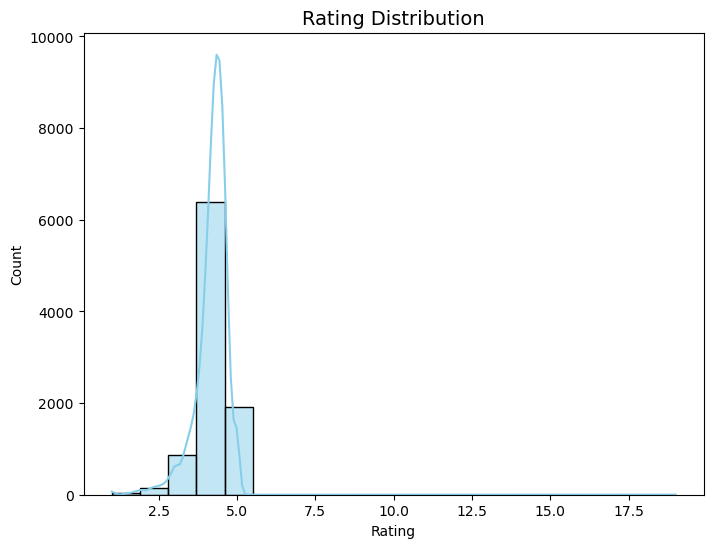

In [30]:
# Rating distribution
plt.figure(figsize=(8,6))
sns.histplot(df["Rating"].dropna(), bins=20, kde=True, color="skyblue")
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

### Most apps have ratings between 4.0 and 4.5, showing that the Play Store is dominated by well-rated apps.

In [32]:
# 📌 Step 8: Save cleaned dataset for Power BI
df.to_csv("googleplaystore_cleaned.csv", index=False)
print(" Cleaned dataset saved successfully!")


 Cleaned dataset saved successfully!
